In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("student-mat-pass-or-fail.csv")

In [3]:
x_s = df.iloc[:,:-1]
y_s = df.iloc[:,-1]

In [4]:
X_train,X_test,y_train,y_test = train_test_split(x_s,y_s,test_size=0.2,shuffle=True)

In [5]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test) 

#The fit method is calculating the mean and variance of each of the features present in our data. 
#The transform method is transforming all the features using the respective mean and variance.

In [6]:
model = Sequential()
model.add(Dense(16,activation='selu',input_shape=[29]))
model.add(Dropout(0.25))
model.add(Dense(16,activation='selu'))
model.add(Dropout(0.25))
model.add(Dense(32,activation='selu'))
model.add(Dropout(0.25))
model.add(Dense(32,activation='selu'))
model.add(Dropout(0.25))
model.add(Dense(16,activation='selu'))
model.add(Dropout(0.25))
model.add(Dense(1,activation='sigmoid'))

In [7]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                480       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1

In [9]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('val_accuracy')>0.97):
            self.model.stop_training=True
            model.save('my_model.h5')

callback = myCallback()

In [10]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=1000,callbacks=[callback])

Epoch 1/1000
10/10 [==============================] - 0s 29ms/step - loss: 0.9069 - accuracy: 0.5832 - val_loss: 0.5409 - val_accuracy: 0.7468
Epoch 2/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.9427 - accuracy: 0.6127 - val_loss: 0.4957 - val_accuracy: 0.7595
Epoch 3/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.8326 - accuracy: 0.6133 - val_loss: 0.4719 - val_accuracy: 0.7722
Epoch 4/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.6832 - accuracy: 0.6689 - val_loss: 0.4560 - val_accuracy: 0.7975
Epoch 5/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.5857 - accuracy: 0.7458 - val_loss: 0.4186 - val_accuracy: 0.8101
Epoch 6/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.5580 - accuracy: 0.7267 - val_loss: 0.3815 - val_accuracy: 0.8228
Epoch 7/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.6352 - accuracy: 0.7146 - val_loss: 0.3497 - val_accuracy: 0.8354
Epoch

10/10 [==============================] - 0s 2ms/step - loss: 0.1386 - accuracy: 0.9557 - val_loss: 0.1397 - val_accuracy: 0.9114
Epoch 59/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.1251 - accuracy: 0.9462 - val_loss: 0.1417 - val_accuracy: 0.9241
Epoch 60/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.1184 - accuracy: 0.9535 - val_loss: 0.1425 - val_accuracy: 0.9241
Epoch 61/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.1805 - accuracy: 0.9330 - val_loss: 0.1431 - val_accuracy: 0.9241
Epoch 62/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.1396 - accuracy: 0.9559 - val_loss: 0.1415 - val_accuracy: 0.9241
Epoch 63/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.1184 - accuracy: 0.9540 - val_loss: 0.1425 - val_accuracy: 0.9241
Epoch 64/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0968 - accuracy: 0.9767 - val_loss: 0.1457 - val_accuracy: 0.9241
Epoch 65/1000

10/10 [==============================] - 0s 2ms/step - loss: 0.0406 - accuracy: 0.9842 - val_loss: 0.1231 - val_accuracy: 0.9620
Epoch 116/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0836 - accuracy: 0.9732 - val_loss: 0.1303 - val_accuracy: 0.9620
Epoch 117/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0513 - accuracy: 0.9843 - val_loss: 0.1331 - val_accuracy: 0.9620
Epoch 118/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0810 - accuracy: 0.9734 - val_loss: 0.1309 - val_accuracy: 0.9620
Epoch 119/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.1314 - accuracy: 0.9624 - val_loss: 0.1233 - val_accuracy: 0.9620
Epoch 120/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0739 - accuracy: 0.9700 - val_loss: 0.1196 - val_accuracy: 0.9620
Epoch 121/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0903 - accuracy: 0.9602 - val_loss: 0.1151 - val_accuracy: 0.9620
Epoch 1

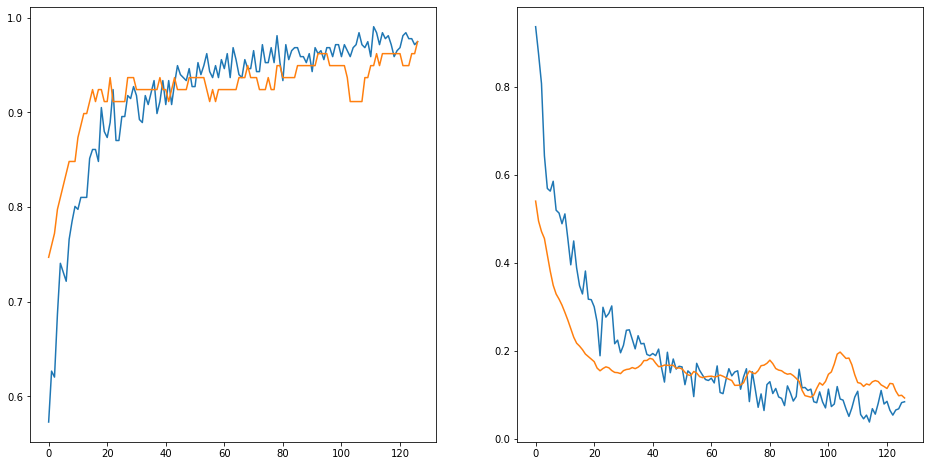

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epoch = range(len(acc))

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')

plt.subplot(1,2,2)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')

plt.show()

In [12]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

y_pred = y_pred.astype(int).ravel()      

# print(np.concatenate((y_pred.reshape(len(y_pred),1), np.array(y_test).reshape(len(y_test),1)),1))

In [14]:
labels=[0,1]
matrix = confusion_matrix(np.array(y_test), y_pred, labels=labels)
print(matrix)

[[25  1]
 [ 1 52]]
